# Natural Language Processing - Word Embedding
# FEEC/Unicamp - July/2020
### Based on https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc
### Based on https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb
### Based on https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [1]:
# Imports needed and logging
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data_file="reviews_data.txt.gz" # Please, define the working directory appropriately

with gzip.open ('reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [3]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2020-07-21 15:15:52,975 : INFO : reading file reviews_data.txt.gz...this may take a while
2020-07-21 15:15:52,976 : INFO : read 0 reviews
2020-07-21 15:15:54,733 : INFO : read 10000 reviews
2020-07-21 15:15:56,489 : INFO : read 20000 reviews
2020-07-21 15:15:58,526 : INFO : read 30000 reviews
2020-07-21 15:16:00,444 : INFO : read 40000 reviews
2020-07-21 15:16:02,547 : INFO : read 50000 reviews
2020-07-21 15:16:04,736 : INFO : read 60000 reviews
2020-07-21 15:16:06,454 : INFO : read 70000 reviews
2020-07-21 15:16:08,014 : INFO : read 80000 reviews
2020-07-21 15:16:09,687 : INFO : read 90000 reviews
2020-07-21 15:16:11,296 : INFO : read 100000 reviews
2020-07-21 15:16:12,896 : INFO : read 110000 reviews
2020-07-21 15:16:14,490 : INFO : read 120000 reviews
2020-07-21 15:16:16,137 : INFO : read 130000 reviews
2020-07-21 15:16:17,874 : INFO : read 140000 reviews
2020-07-21 15:16:19,791 : INFO : read 150000 reviews
2020-07-21 15:16:21,489 : INFO : read 160000 reviews
2020-07-21 15:16:23,112

In [4]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2020-07-21 15:16:38,084 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-07-21 15:16:38,104 : INFO : collecting all words and their counts
2020-07-21 15:16:38,105 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-07-21 15:16:38,311 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-07-21 15:16:38,517 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-07-21 15:16:38,762 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-07-21 15:16:38,986 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-07-21 15:16:39,243 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-07-21 15:16:39,484 : INFO : PROGRESS: at sentence #60000, processed 11013723 words, keeping 76781 word types
2020-07-21 15:16:39,684 : INFO : PROGRESS: a

2020-07-21 15:17:22,655 : INFO : EPOCH 2 - PROGRESS: at 77.74% examples, 1975303 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:17:23,667 : INFO : EPOCH 2 - PROGRESS: at 84.29% examples, 1975056 words/s, in_qsize 19, out_qsize 2
2020-07-21 15:17:24,667 : INFO : EPOCH 2 - PROGRESS: at 91.21% examples, 1976038 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:17:25,677 : INFO : EPOCH 2 - PROGRESS: at 97.97% examples, 1974625 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:17:25,967 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-07-21 15:17:25,970 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-07-21 15:17:25,972 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-07-21 15:17:25,973 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-07-21 15:17:25,974 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-07-21 15:17:25,975 : INFO : worker thread finished; awaiting finish of 4 more th

2020-07-21 15:18:07,902 : INFO : EPOCH 5 - PROGRESS: at 70.05% examples, 1940859 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:08,907 : INFO : EPOCH 5 - PROGRESS: at 76.42% examples, 1938706 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:09,925 : INFO : EPOCH 5 - PROGRESS: at 82.91% examples, 1939148 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:10,944 : INFO : EPOCH 5 - PROGRESS: at 89.66% examples, 1940021 words/s, in_qsize 16, out_qsize 3
2020-07-21 15:18:11,944 : INFO : EPOCH 5 - PROGRESS: at 96.53% examples, 1943487 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:12,410 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-07-21 15:18:12,424 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-07-21 15:18:12,431 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-07-21 15:18:12,432 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-07-21 15:18:12,433 : INFO : worker thread finished; awai

2020-07-21 15:18:50,805 : INFO : EPOCH 3 - PROGRESS: at 42.76% examples, 1922607 words/s, in_qsize 19, out_qsize 1
2020-07-21 15:18:51,812 : INFO : EPOCH 3 - PROGRESS: at 49.78% examples, 1927217 words/s, in_qsize 19, out_qsize 1
2020-07-21 15:18:52,815 : INFO : EPOCH 3 - PROGRESS: at 56.44% examples, 1930245 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:53,818 : INFO : EPOCH 3 - PROGRESS: at 63.24% examples, 1932818 words/s, in_qsize 18, out_qsize 1
2020-07-21 15:18:54,824 : INFO : EPOCH 3 - PROGRESS: at 69.77% examples, 1929835 words/s, in_qsize 16, out_qsize 3
2020-07-21 15:18:55,832 : INFO : EPOCH 3 - PROGRESS: at 76.20% examples, 1929944 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:56,839 : INFO : EPOCH 3 - PROGRESS: at 82.63% examples, 1932659 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:18:57,839 : INFO : EPOCH 3 - PROGRESS: at 89.23% examples, 1932958 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:18:58,844 : INFO : EPOCH 3 - PROGRESS: at 95.84% examples, 1931488

2020-07-21 15:19:36,866 : INFO : EPOCH 6 - PROGRESS: at 35.72% examples, 1921012 words/s, in_qsize 18, out_qsize 1
2020-07-21 15:19:37,866 : INFO : EPOCH 6 - PROGRESS: at 42.52% examples, 1918199 words/s, in_qsize 16, out_qsize 3
2020-07-21 15:19:38,874 : INFO : EPOCH 6 - PROGRESS: at 49.38% examples, 1917031 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:39,876 : INFO : EPOCH 6 - PROGRESS: at 55.76% examples, 1912577 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:40,886 : INFO : EPOCH 6 - PROGRESS: at 62.32% examples, 1910469 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:41,889 : INFO : EPOCH 6 - PROGRESS: at 69.07% examples, 1912763 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:42,890 : INFO : EPOCH 6 - PROGRESS: at 75.66% examples, 1918762 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:43,893 : INFO : EPOCH 6 - PROGRESS: at 81.67% examples, 1915217 words/s, in_qsize 19, out_qsize 0
2020-07-21 15:19:44,894 : INFO : EPOCH 6 - PROGRESS: at 88.16% examples, 1915487

2020-07-21 15:20:23,316 : INFO : EPOCH 9 - PROGRESS: at 28.41% examples, 1888090 words/s, in_qsize 19, out_qsize 1
2020-07-21 15:20:24,322 : INFO : EPOCH 9 - PROGRESS: at 35.21% examples, 1895097 words/s, in_qsize 18, out_qsize 2
2020-07-21 15:20:25,336 : INFO : EPOCH 9 - PROGRESS: at 42.12% examples, 1893390 words/s, in_qsize 20, out_qsize 3
2020-07-21 15:20:26,349 : INFO : EPOCH 9 - PROGRESS: at 49.16% examples, 1901080 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:20:27,357 : INFO : EPOCH 9 - PROGRESS: at 55.68% examples, 1902646 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:20:28,367 : INFO : EPOCH 9 - PROGRESS: at 62.30% examples, 1903090 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:20:29,378 : INFO : EPOCH 9 - PROGRESS: at 69.05% examples, 1905228 words/s, in_qsize 20, out_qsize 1
2020-07-21 15:20:30,385 : INFO : EPOCH 9 - PROGRESS: at 75.47% examples, 1905774 words/s, in_qsize 20, out_qsize 0
2020-07-21 15:20:31,389 : INFO : EPOCH 9 - PROGRESS: at 81.67% examples, 1907981

(303484111, 415193550)

In [5]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2020-07-21 15:20:50,048 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8636475205421448),
 ('stained', 0.7811144590377808),
 ('unclean', 0.7751052379608154),
 ('dusty', 0.7669270634651184),
 ('smelly', 0.7606022357940674),
 ('grubby', 0.7513071298599243),
 ('grimy', 0.7298195362091064),
 ('dingy', 0.7213117480278015),
 ('soiled', 0.7201225757598877),
 ('gross', 0.719785213470459)]

In [6]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9226269721984863),
 ('friendly', 0.8329194188117981),
 ('cordial', 0.8174973726272583),
 ('curteous', 0.7812621593475342),
 ('professional', 0.780734658241272),
 ('attentive', 0.775324285030365)]

In [7]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('canada', 0.6775115728378296),
 ('germany', 0.6471348404884338),
 ('spain', 0.6386251449584961),
 ('thailand', 0.6204005479812622),
 ('mexico', 0.6077990531921387),
 ('england', 0.6041700839996338)]

In [8]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('horrified', 0.7922606468200684),
 ('amazed', 0.7912759780883789),
 ('appalled', 0.7649403214454651),
 ('stunned', 0.7644959688186646),
 ('astonished', 0.7506698369979858),
 ('dismayed', 0.7347558736801147)]

In [9]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7083287835121155),
 ('blanket', 0.7062539458274841),
 ('mattress', 0.6814241409301758),
 ('matress', 0.6664750576019287),
 ('quilt', 0.6637673377990723),
 ('pillowcase', 0.6376977562904358),
 ('pillows', 0.637412428855896),
 ('foam', 0.6321302652359009),
 ('sheets', 0.6302813291549683),
 ('comforter', 0.6184894442558289)]

In [10]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.76060236

In [11]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

D:\Anaconda3\envs\tf_gpu_2020\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'shower'

In [12]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

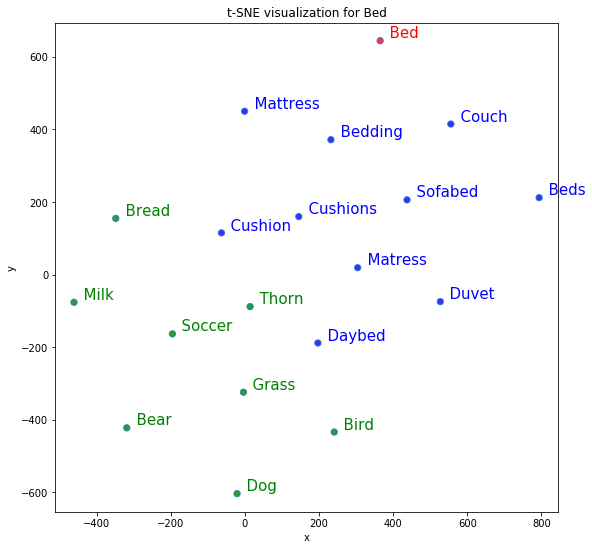

In [13]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt

tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

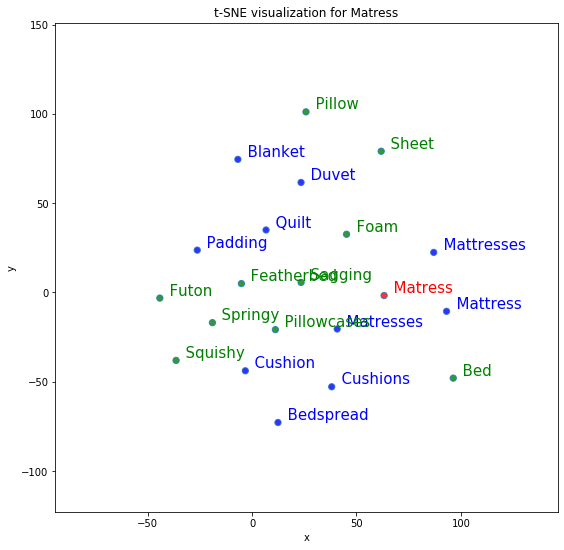

In [14]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])